In [2]:
print("The start of Optimisation HW1!")

print("These are not the droids you're looking for")

The start of Optimisation HW1!
These are not the droids you're looking for


In [1]:
#Import relevant libraries

import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [52]:
#Create datasets. Start with labelled examples

data_size = 500
l = int(data_size*0.1)

points_l, labels = datasets.make_blobs(n_samples=l,n_features=2, centers=5, cluster_std=2, random_state=2)

print(points_l[1],labels[1])

[-6.27317307 -3.79726939] 4


In [ ]:
#Then, using information from the labelled examples, create unlabelled examples in a range

x_max = np.max(points_l[:,0])
x_min = np.min(points_l[:,0])
y_max = np.max(points_l[:,1])
y_min = np.min(points_l[:,1])

x_range = x_max-x_min
y_range = y_max-y_min

x_center = x_range/2
y_center = y_range/2

x_mean = np.mean(points_l[:,0])
y_mean = np.mean(points_l[:,1])

x_std = np.std(points_l[:,0])
y_std = np.mean(points_l[:,1])

x_unlabelled = []
y_unlabelled = []
unlabelled = []

for i in range(0,data_size):
    x = random.uniform(x_center - 2*x_range, x_center + 2*x_range)
    y = random.uniform(y_center - 2*y_range, y_center + 2*y_range)

    x_unlabelled.append(x)
    y_unlabelled.append(y)
    unlabelled.append((x,y))

In [54]:
points_l[:,0]

array([ -4.12253641,  -6.27317307,   0.45513564,  -3.24596259,
        -6.67006028,  -1.16041195,  -3.8762856 ,  -2.86200257,
        -1.68386355,   1.99696397,  -0.33624108, -11.22592623,
        -7.21352785,  -1.19702317,  -6.71481186,  -2.3439828 ,
        -0.17719387,  -7.48282554,  -4.51678811,  -6.83103802,
        -2.77584386,  -2.43127692,  -1.95774589,  -1.65984353,
         0.40808781,  -3.59849057,  -2.74293175,  -6.28596585,
        -8.10450521,   3.92860558,  -0.76696105,  -2.94799511,
         1.73413863,  -0.5440511 ,   2.21593112,  -4.6150794 ,
        -3.03631774,  -0.7256513 ,  -0.20198532,   0.36623316,
        -1.31836295,  -5.67329006,   0.99326908,  -2.55541198,
        -5.44541421,  -3.17255647,  -3.24317406,  -4.25762131,
        -1.67178444,  -0.66502102])

In [ ]:
math.dist(unlabelled[0], points_l[0])

7.358909251008662

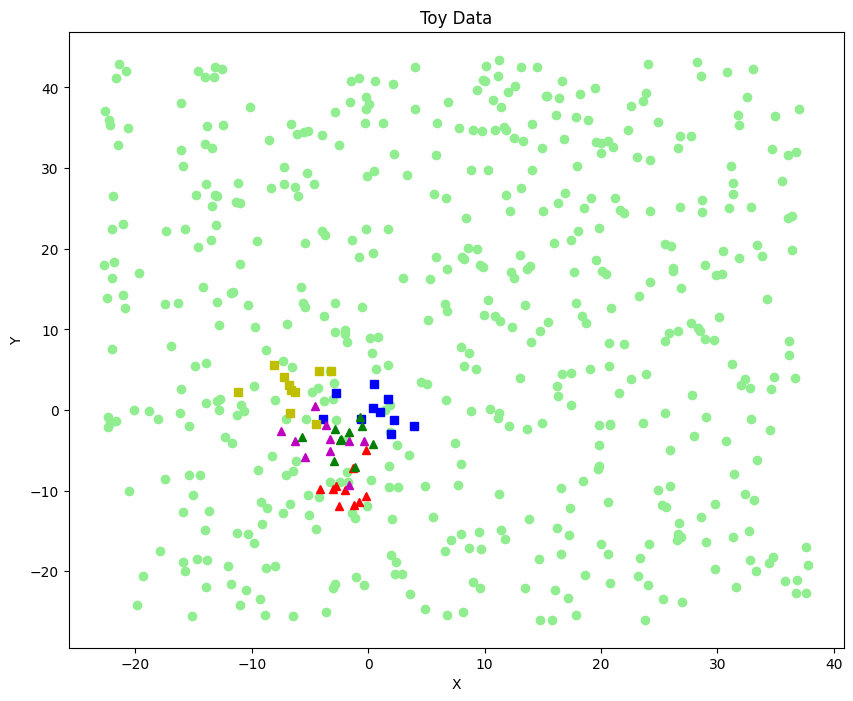

In [59]:
#Visualize

fig = plt.figure(figsize=(10,8))
plt.plot(points_l[:, 0][labels == 0], points_l[:, 1][labels == 0], 'r^')
plt.plot(points_l[:, 0][labels == 1], points_l[:, 1][labels == 1], 'bs')
plt.plot(points_l[:, 0][labels == 2], points_l[:, 1][labels == 2], 'g^')
plt.plot(points_l[:, 0][labels == 3], points_l[:, 1][labels == 3], 'ys')
plt.plot(points_l[:, 0][labels == 4], points_l[:, 1][labels == 4], 'm^')
plt.scatter(x_unlabelled, y_unlabelled, color='lightgreen', marker ='o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Toy Data')
plt.show()

In [13]:
# Define weight arrays

#Array w is the weights array between labelled examples and unlabelled examples

w_rows = []

for point in unlabelled:
    row = []
    for point2 in points_l:
        d = math.dist(point, point2)
        row.append(d)
    w_rows.append(row)

w = np.array(w_rows)

#Array w_ is between unlabelled.

rows = []

for points in unlabelled:
    row=[]
    for point2 in unlabelled:
        d = math.dist(point, point2)
        row.append(d)
    rows.append(row)

w_ = np.array(rows)

print(w.shape, w_.shape)

(1000, 100) (1000, 1000)
